# 1.) Pull in Data and Convert ot Monthly

In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [47]:
#difference in stock price
df['Diff'] = df['Adj Close'].diff().shift(-1)

#Target up or down
df['Target'] = np.sign(df["Diff"])

#Option Preimum
df["Premium"] = 0.08 * df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [49]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [50]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [51]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [52]:
df['Predictions'] = y_pred

In [53]:
df["Profits"] = 0

In [54]:
#True Positive
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

#False Positive 
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df['Diff'] + df["Premium"]


# 5.) Plot profits over time

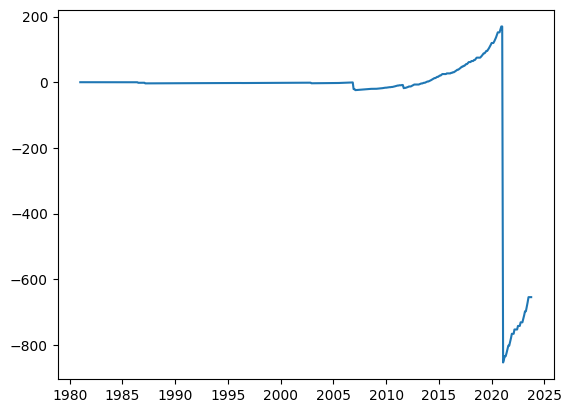

In [55]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

# 5.5 Your skills from MQE to help Mr.Liu's venture

After I hear Mr.Liu talked about his ventures, I realize that the data processing and statistical analyzing skills is essential in the BlockChain area because the platforms produced huge amount data whicn could include different aspects everyday.  Luckily, I think I obtained both these skills from the MQE courses. Also, I think, from the MQE, the critical thinking and the mathematic equations that support the theories we use to analyze the data greatly help me in the ventures like Mr.Liu's. 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.